# DSC207R Python Class - Final Project
## Ekai Richards

In [1]:
# Importing Libraries

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import math
import scipy.stats as ss
from itertools import product
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from kmodes.kmodes import KModes
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
from sklearn.metrics import accuracy_score

## Dataset Selection

In [2]:
# Import Datasets
# Datasets are being called from a public github repository I created for this project

df_q = pd.read_csv('https://raw.githubusercontent.com/Fr3ck1es/YRBS-Dataset/main/YRBS_National_2021_Original.txt', sep=',')

df_qn = pd.read_csv('https://raw.githubusercontent.com/Fr3ck1es/YRBS-Dataset/main/YRBS_National_2021_Binary.txt', sep=',')

df_ht = pd.read_csv('https://raw.githubusercontent.com/Fr3ck1es/YRBS-Dataset/main/CDC_Heights.csv')

C:\Users\ekait\AppData\Local\Temp\ipykernel_5184\4291223313.py:4: DtypeWarning: Columns (2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  df_q = pd.read_csv('https://raw.githubusercontent.com/Fr3ck1es/YRBS-Dataset/main/YRBS_National_2021_Original.txt', sep=',')
C:\Users\ekait\AppData\Local\Temp\ipykernel_5184\4291223313.py:6: DtypeWarning: Columns (2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  df_qn = pd.read_csv('https://raw.githubusercontent.com/Fr3ck1es/YRBS-Dataset/main/YRBS_National_2021_Binary.txt', sep=',')


### Reason

**Caution, this dataset and its exploration discuss the following topics that may be uncomfortable to some people. Reader discretion is advised.**
- Depression
- Suicide
- Sexual Violence
- Drug Use

The Youth Risk Behavior Survey (YRBS) is a survey conducted by the CDC every 2 years. It samples from highschools from nearly every state (some states do not participate) and measures health-related behaviors and experiences that can lead to death and disability among youth and adults. Data sets go back 30 years, starting in 1991, however it should be noted the questionnaire has changed a number of times. Results are used to monitor health trends, identify emerging issues, and plan and evaluate programs that can help improve adolescent health. Schools are sampled via cluster sampling, and classrooms are selected at random. Data is then checked for logical clarity, examined for seriousness in answers (to account for joke answers by students) and is provided as both a raw data set and a binary dichotomized data set. 

I will be mostly focusing on data collected from 2021 that has already been dichotomized. But I will be merging in the raw dataset to capture some other data, as well as CDC percentile data from 2000 to categorize the remaining data I am concerned about.

I am particularly intereseted in this data set because it collects questions that focus on mental health. Suicide is the 3rd leading cause of death amongst youth, and systems that can identify trends and predict issues among students are undoubtedly useful to know

More information can be found here:
https://www.cdc.gov/healthyyouth/data/yrbs/yrbs_data_summary_and_trends.htm

### Dataset Previews

In [3]:
df_q.head()

,site,raceeth,q6orig,q7orig,record,orig_rec,q1,q2,q3,q4,...,q94,q95,q96,q97,q98,q99,BMIPCT,weight,stratum,psu
0,XX,3.0,502.0,155.0,1.0,NaN,5.0,1.0,3.0,2.0,...,2.0,1.0,5.0,4.0,1.0,1.0,94.09,3.64,214.0,87023.0
1,XX,7.0,509.0,NaN,2.0,NaN,4.0,2.0,NaN,1.0,...,3.0,3.0,1.0,5.0,1.0,1.0,NaN,4.14,214.0,87023.0
2,XX,6.0,507.0,136.0,3.0,NaN,4.0,2.0,2.0,1.0,...,2.0,3.0,2.0,4.0,1.0,1.0,65.30,4.14,214.0,87023.0
3,XX,6.0,509.0,133.0,4.0,NaN,4.0,2.0,2.0,1.0,...,2.0,3.0,3.0,3.0,2.0,2.0,42.73,4.14,214.0,87023.0
4,XX,7.0,603.0,196.0,5.0,NaN,3.0,2.0,2.0,1.0,...,2.0,3.0,2.0,5.0,1.0,1.0,91.26,4.14,214.0,87023.0


In [4]:
df_qn.head()

,site,raceeth,q6orig,q7orig,record,orig_rec,q1,q2,q3,q4,...,qnwater1,qnwater2,qnwater3,qnillict,BMIPCT,qnowt,qnobese,weight,stratum,psu
0,XX,7.0,410.0,120.0,10.0,NaN,4.0,1.0,2.0,1.0,...,2.0,2.0,2.0,2.0,88.22,1.0,2.0,4.10,214.0,87023.0
1,XX,6.0,NaN,NaN,11.0,NaN,4.0,1.0,2.0,1.0,...,1.0,2.0,2.0,2.0,NaN,NaN,NaN,4.10,214.0,87023.0
2,XX,7.0,NaN,NaN,12.0,NaN,4.0,1.0,2.0,1.0,...,2.0,2.0,2.0,2.0,NaN,NaN,NaN,4.10,214.0,87023.0
3,XX,7.0,606.0,134.0,13.0,NaN,4.0,2.0,2.0,1.0,...,2.0,2.0,2.0,2.0,0.45,2.0,2.0,4.14,214.0,87023.0
4,XX,7.0,504.0,98.0,14.0,NaN,4.0,2.0,2.0,1.0,...,2.0,2.0,2.0,2.0,4.42,2.0,2.0,4.14,214.0,87023.0


In [5]:
df_ht.head()

,Sex,Agemos,L,M,S,P3,P5,P10,P25,P50,P75,P90,P95,P97
0,1,24.0,0.941524,86.452201,0.040322,79.910844,80.729773,81.991714,84.102892,86.452201,88.805249,90.926191,92.196879,93.022654
1,1,24.5,1.007208,86.861609,0.040396,80.260371,81.088685,82.364010,84.494706,86.861609,89.228048,91.357530,92.631767,93.459230
2,1,25.5,0.837251,87.652473,0.040578,81.005294,81.834452,83.113871,85.258877,87.652473,90.056755,92.229661,93.534066,94.382780
3,1,26.5,0.681493,88.423264,0.040723,81.734157,82.564061,83.847162,86.005173,88.423264,90.862604,93.076082,94.408849,95.277617
4,1,27.5,0.538780,89.175492,0.040833,82.448456,83.278986,84.565344,86.735069,89.175492,91.647114,93.898271,95.257541,96.145118


We can see that df_q and df_qn are very similar. Both have some basic demographic information as well their following questionnaire information. Our df_ht is a collection of heights, what percentile they belong to, and the age and sex those percentiles belong to.

## Data Cleaning

From what we saw above, df_qn has many of its fields calculated making them binary in nature. This makes analysis a bit easier. But df_qn is missing question 64 (q64) and question 65 (q65), which tackles questions regarding sexuality, so we will need to merge those in from df_q. In addition, df_qn has 2 binary metrics that categorize a subject into being overweight or obese as related to age and sex. This allows for a controlled binary measure of weight, while also allowing us to remove the continous variable of weight during analysis. But height does not have such a categorization. So we will use the df_ht dataset to categorize students into being 0 (Short), 1 (Average), 2 (Tall), sourced from the same 2000's census data the YRBS staff used in making those df_qn overweight and obesity variables.

This dataset also has a number of NaN values that need to be addressed. While a majority of them will be dropped, there is a number of values where non-answers are a result of logical inability. For example, questions that are asking if a student has ever driven a vehicle while under the influence, can only be answered by students who've driven a vehicle. As such, questions that are being entered as NaN in the df_qn data set as a result of this will be replaced to assume the subject marked no. All other questions will that have NaN answers will be dropped.

### Cleaning

Let's get started with cleaning. As stated earlier there are a number of fields that have NaN. Luckily we can drop a number of fields that are redundant or that were deemed unnecessary for this analysis. We will then convert the 0's in some fields for questions where that is appropropriate. After all that we  will drop the NaNs. We will also need to convert some non-categorical fields into categorical ones. This will be followed by a re-ordering of the columns so we have an easier time seeing our demographics and target variable. Finally, we will make 2 dataframes. One with english categories, and another with numerical ones. This will make our lives easier later.

Here we start with deleting columns we don't need.

In [6]:
list_qn_delete = ['site', 'q6orig', 'q7orig', 'orig_rec', 
                  'q4', 'q5', 
                  'q7',
                  'qn32', 'qn35', 'qn37', 'qn38',
                  'qn50', 'qn51', 'qn52', 'qn53', 'qn54', 'qn89',
                  'qn68', 'qn69', 'qn70', 'qn71', 'qn72', 'qn73',
                  'qndaycig', 'qndayevp', 'qndayskl', 'qndaycgr', 'qntb2', 'qntb3', 'qntb5',
                  'qniudimp', 'qnothhpl', 'qndualbc', 'qnbcnone',
                  'qnfr2',
                  'qnveg2', 'qnveg3', 
                  'qnsoda2', 'qnmilk1', 'qnmilk3',
                  'qnpa7day', 'qndlype',
                  'qnspdrk2', 'qnwater2', 'qnwater3',
                  'BMIPCT',
                  'weight','stratum', 'psu']
df_qn_trim = df_qn.drop(list_qn_delete, axis=1)
df_qn_trim.head()

,raceeth,record,q1,q2,q3,q6,qn8,qn9,qn10,qn11,...,qnveg1,qnsoda1,qnbk7day,qnpa0day,qnnodnt,qnspdrk1,qnwater1,qnillict,qnowt,qnobese
0,7.0,10.0,4.0,1.0,2.0,1.47,1.0,1.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0
1,6.0,11.0,4.0,1.0,2.0,NaN,1.0,2.0,NaN,NaN,...,2.0,2.0,2.0,1.0,2.0,2.0,1.0,2.0,NaN,NaN
2,7.0,12.0,4.0,1.0,2.0,NaN,1.0,2.0,NaN,NaN,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,NaN,NaN
3,7.0,13.0,4.0,2.0,2.0,1.98,1.0,2.0,NaN,NaN,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
4,7.0,14.0,4.0,2.0,2.0,1.63,2.0,2.0,NaN,NaN,...,1.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0


Here we are replacing NaN with 0 for a number of columns that satisfy the following: was the calculation that determined the binary dichotomous variable, using the total set of raw question options as the denominator? If no, it is added to the qn_zero_list. We then dropna for the rest.

In [7]:
list_qn_zero = ['qn10', 'qn11', 'qn21', 'qn22', 
                'qn33', 'qn36', 'qn39', 'qn44', 
                'qn61', 'qn62', 'qn63', 'qn94']
df_qn_trim[list_qn_zero] = df_qn_trim[list_qn_zero].fillna(0)
df_qn_trim = df_qn_trim.dropna()
df_qn_trim.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4770 entries, 3 to 9348
Data columns (total 98 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   raceeth   4770 non-null   float64
 1   record    4770 non-null   float64
 2   q1        4770 non-null   float64
 3   q2        4770 non-null   float64
 4   q3        4770 non-null   float64
 5   q6        4770 non-null   float64
 6   qn8       4770 non-null   float64
 7   qn9       4770 non-null   float64
 8   qn10      4770 non-null   float64
 9   qn11      4770 non-null   float64
 10  qn12      4770 non-null   float64
 11  qn13      4770 non-null   float64
 12  qn14      4770 non-null   float64
 13  qn15      4770 non-null   float64
 14  qn16      4770 non-null   float64
 15  qn17      4770 non-null   float64
 16  qn18      4770 non-null   float64
 17  qn19      4770 non-null   float64
 18  qn20      4770 non-null   float64
 19  qn21      4770 non-null   float64
 20  qn22      4770 non-null   float64
 

Here we are converting all the binary questions into 1 = Yes and 0 = No. The original had 1 = Yes, and 2 = No. The only one I will handle differently is q2 which handles subject sex. I will instead have 0 = Female and 1 = Male. We will also be converting every value (aside from the height value) into a integer.

In [8]:
df_qn_binary = df_qn_trim.copy()
list_qn_demo = ['raceeth', 'record', 'q1', 'q2', 'q3', 'q6']
list_qn_questions = df_qn_binary.columns.drop(list_qn_demo)
df_qn_binary[list_qn_questions] = df_qn_binary[list_qn_questions].replace(2,0)
df_qn_binary['q2'] = df_qn_binary['q2'].replace({1:0,2:1})

list_qn_ints = df_qn_binary.columns.drop('q6')
df_qn_binary[list_qn_ints] = df_qn_binary[list_qn_ints].astype(int)

df_qn_binary.head()

,raceeth,record,q1,q2,q3,q6,qn8,qn9,qn10,qn11,...,qnveg1,qnsoda1,qnbk7day,qnpa0day,qnnodnt,qnspdrk1,qnwater1,qnillict,qnowt,qnobese
3,7,13,4,1,2,1.98,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,7,14,4,1,2,1.63,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0
5,7,15,4,1,2,1.73,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0
7,7,17,4,1,2,1.65,0,0,0,0,...,1,0,1,0,0,0,1,0,0,0
8,6,18,4,1,2,1.70,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0


### Classification Datasets

Our dataset is now ready for merging, so we will start making data sets that are needed for classification. We will start with sexuality. To determine sexuality we will follow some of the YRBS's guidelines. We will check both the self-described sexuality (question 64), as well as matching the sex of the participant (question 2) and sexual encounters (question 65). Anyone who had a sexual encounter with the same sex will be classified under the LGBTQ category. Additionally anyone who answered "not sure" to question 65 will be classified as under the LGBTQ category. Heterosexual will be denoted as 0, LGBTQ will be dentoed as 1.

In [9]:
df_orientation_cat = df_q[['record', 'q2', 'q64', 'q65']].dropna().astype(int)

def sexuality(x):
    if x['q65'] in range(2,6):
        return 1
    elif ((x['q2'] == 1 & (x['q64'] == 2 | x['q64'] == 4)) 
          | (x['q2'] == 2 & (x['q64'] == 3 | x['q64'] == 4))):
        return 1
    else:
        return 0

df_orientation_cat['Sexuality'] = df_orientation_cat.apply(sexuality, axis = 1)
df_orientation_cat = df_orientation_cat[['record', 'Sexuality']]
df_orientation_cat.head()

,record,Sexuality
0,1,1
1,2,0
3,4,0
4,5,0
5,6,0


Next is an aggregate suicide score. We will assume any positives in these 4 questions that ask about a person's history of suicide will classify that individual as possibly suicidal.

In [10]:
df_suicidal_cat = df_qn_binary[['record', 'qn26', 'qn27', 'qn28', 'qn29']]
df_suicidal_cat = df_suicidal_cat.dropna().astype(int)
df_suicidal_cat['Suicidal'] = df_suicidal_cat[['qn26', 'qn27', 'qn28', 'qn29']].any(axis=1).astype(int)
df_suicidal_cat = df_suicidal_cat[['record', 'Suicidal']]
df_suicidal_cat.head()

,record,Suicidal
3,13,0
4,14,0
5,15,1
7,17,0
8,18,0


Here we will categorize height. As described earlier we are going to use the percentiles from the 2000s US census data, matching the YRBS protocal for determing whether a subject is overweight or obese. We will use the date from a subjects age + 6 months as our determining percentiles. You may notice that our sex category is the opposite of the YRBS classification. That is because unlike the YRBS, the census categorized 1 = Male and 2 = Female.

In [11]:
df_ht_cat = df_ht.drop(['L','M','S','P3','P10','P25','P50','P75','P90','P97'], axis=1)

list_ht_age = [150.5, 162.5, 174.5, 186.5, 198.5, 210.5, 222.5]
list_ht_age = {150.5:1, 162.5:2, 174.5:3, 186.5:4, 198.5:5, 210.5:6, 222.5:7}

df_ht_cat['Sex'] = df_ht_cat['Sex'].replace({1:1,2:0})

df_ht_cat = df_ht_cat[df_ht_cat['Agemos'].isin(list_ht_age)]
df_ht_cat['Agemos'] = df_ht_cat['Agemos'].replace(list_ht_age).astype(int)

df_ht_cat['Concat'] = (df_ht_cat['Agemos'].astype(str) + df_ht_cat['Sex'].astype(str))

df_ht_cat = df_ht_cat.drop(['Sex','Agemos'], axis=1)
df_ht_cat = df_ht_cat[['Concat', 'P5', 'P95']]
df_ht_cat['P5'] = df_ht_cat['P5']/100
df_ht_cat['P95'] = df_ht_cat['P95']/100
df_ht_cat.head()

,Concat,P5,P95
127,11,1.402831,1.655302
139,21,1.470498,1.733965
151,31,1.538127,1.800676
163,41,1.589798,1.841997
175,51,1.621196,1.863613


### Merging and Final Cleaning

We will now begin merging our datasets and do some final cleaning.

In [12]:
# Merging data sets together
df_qn_clean = df_qn_binary.copy()

df_qn_clean['Concat'] = (df_qn_clean['q1'].astype(str) + df_qn_clean['q2'].astype(str))
df_qn_clean = pd.merge(df_qn_clean, df_ht_cat, on='Concat')
df_qn_clean = pd.merge(df_qn_clean, df_orientation_cat, on='record')

df_qn_clean.describe()

,raceeth,record,q1,q2,q3,q6,qn8,qn9,qn10,qn11,...,qnpa0day,qnnodnt,qnspdrk1,qnwater1,qnillict,qnowt,qnobese,P5,P95,Sexuality
count,4715.000000,4715.000000,4715.000000,4715.000000,4715.000000,4715.000000,4715.000000,4715.000000,4715.000000,4715.000000,...,4715.000000,4715.000000,4715.000000,4715.000000,4715.000000,4715.000000,4715.000000,4715.000000,4715.000000,4715.000000
mean,5.057264,4802.830117,4.813574,0.525981,2.561400,1.698333,0.367550,0.126193,0.022057,0.211241,...,0.147826,0.009332,0.099046,0.784093,0.112619,0.156098,0.169035,1.564748,1.795222,0.227996
std,1.502970,2696.852994,1.184607,0.499377,1.099714,0.101231,0.482189,0.332102,0.146885,0.408232,...,0.354965,0.096160,0.298755,0.411493,0.316160,0.362986,0.374823,0.051222,0.063444,0.419584
min,1.000000,5.000000,2.000000,0.000000,1.000000,1.270000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.470498,1.702074,0.000000
25%,5.000000,2524.000000,4.000000,0.000000,2.000000,1.630000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.521352,1.734288,0.000000
50%,5.000000,4803.000000,5.000000,1.000000,3.000000,1.700000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.538127,1.800676,0.000000
75%,6.000000,7196.500000,6.000000,1.000000,4.000000,1.780000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.621196,1.863613,0.000000
max,8.000000,9407.000000,7.000000,1.000000,5.000000,2.030000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.645686,1.880690,1.000000


In [13]:
# Categorizing heights, 1=Short, 2=Average, 3=Tall
def heightCheck(x):
    if x['q6'] <= x['P5']:
        return '1'
    elif x['q6'] >= x['P95']:
        return '3'
    else:
        return '2'

df_qn_clean['Height'] = df_qn_clean.apply(heightCheck, axis = 1).astype(int)
df_qn_clean = df_qn_clean.drop(['P5', 'P95', 'Concat'], axis=1)
df_qn_clean.head()

,raceeth,record,q1,q2,q3,q6,qn8,qn9,qn10,qn11,...,qnbk7day,qnpa0day,qnnodnt,qnspdrk1,qnwater1,qnillict,qnowt,qnobese,Sexuality,Height
0,7,13,4,1,2,1.98,1,0,0,0,...,0,0,0,0,0,0,0,0,0,3
1,7,14,4,1,2,1.63,0,0,0,0,...,1,0,0,0,0,0,0,0,0,2
2,7,15,4,1,2,1.73,0,0,0,0,...,1,0,0,0,0,0,0,0,0,2
3,7,17,4,1,2,1.65,0,0,0,0,...,1,0,0,0,1,0,0,0,0,2
4,6,18,4,1,2,1.70,0,0,0,0,...,0,0,0,0,1,0,0,0,0,2


Let's check up on our list of variables, reorder the columns, and rename the demographics for clarity.

In [14]:
print(df_qn_clean.columns.to_list())

['raceeth', 'record', 'q1', 'q2', 'q3', 'q6', 'qn8', 'qn9', 'qn10', 'qn11', 'qn12', 'qn13', 'qn14', 'qn15', 'qn16', 'qn17', 'qn18', 'qn19', 'qn20', 'qn21', 'qn22', 'qn23', 'qn24', 'qn25', 'qn26', 'qn27', 'qn28', 'qn29', 'qn30', 'qn31', 'qn33', 'qn34', 'qn36', 'qn39', 'qn40', 'qn41', 'qn42', 'qn43', 'qn44', 'qn45', 'qn46', 'qn47', 'qn48', 'qn49', 'qn55', 'qn56', 'qn57', 'qn58', 'qn59', 'qn60', 'qn61', 'qn62', 'qn63', 'qn66', 'qn67', 'qn74', 'qn75', 'qn76', 'qn77', 'qn78', 'qn79', 'qn80', 'qn81', 'qn82', 'qn83', 'qn84', 'qn85', 'qn86', 'qn87', 'qn88', 'qn90', 'qn91', 'qn92', 'qn93', 'qn94', 'qn95', 'qn96', 'qn97', 'qn98', 'qn99', 'qnfrcig', 'qnfrevp', 'qnfrskl', 'qnfrcgr', 'qntb4', 'qnfr0', 'qnfr1', 'qnveg0', 'qnveg1', 'qnsoda1', 'qnbk7day', 'qnpa0day', 'qnnodnt', 'qnspdrk1', 'qnwater1', 'qnillict', 'qnowt', 'qnobese', 'Sexuality', 'Height']


In [15]:
list_qn_col_reorder = ['record', 'raceeth', 'q1', 'q3', 'q2', 'Sexuality', 'Height', 
                       'qnowt', 'qnobese', 
                       'qn8', 'qn9', 'qn10', 'qn11', 'qn12', 'qn13', 'qn14', 'qn15', 
                       'qn16', 'qn17', 'qn18', 'qn19', 'qn20', 'qn21', 'qn22', 'qn23', 
                       'qn24', 'qn25', 'qn26', 'qn27', 'qn28', 'qn29', 'qn30', 'qn31', 
                       'qn33', 'qn34', 'qn36', 'qn39', 'qn40', 'qn41', 'qn42', 'qn43', 
                       'qn44', 'qn45', 'qn46', 'qn47', 'qn48', 'qn49', 'qn55', 'qn56', 
                       'qn57', 'qn58', 'qn59', 'qn60', 'qn61', 'qn62', 'qn63', 'qn66', 
                       'qn67', 'qn74', 'qn75', 'qn76', 'qn77', 'qn78', 'qn79', 'qn80', 
                       'qn81', 'qn82', 'qn83', 'qn84', 'qn85', 'qn86', 'qn87', 'qn88', 
                       'qn90', 'qn91', 'qn92', 'qn93', 'qn94', 'qn95', 'qn96', 'qn97', 
                       'qn98', 'qn99', 'qnfrcig', 'qnfrevp', 'qnfrskl', 'qnfrcgr', 'qntb4', 
                       'qnfr0', 'qnfr1', 'qnveg0', 'qnveg1', 'qnsoda1', 'qnbk7day', 'qnpa0day', 
                       'qnnodnt', 'qnspdrk1', 'qnwater1', 'qnillict']
df_qn_clean = df_qn_clean[list_qn_col_reorder]

In [16]:
list_qn_cols_rename = {'raceeth': 'Race', 
                       'q1': 'Age Group', 'q2': 'Sex',
                       'q3': 'Grade Group'}
df_qn_clean = df_qn_clean.rename(columns=list_qn_cols_rename)

Here are the final dataframes we will be working with, and some modifications depending on the task at hand.

In [17]:
# Our main dataframe
df = df_qn_clean.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4715 entries, 0 to 4714
Data columns (total 99 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   record       4715 non-null   int32
 1   Race         4715 non-null   int32
 2   Age Group    4715 non-null   int32
 3   Grade Group  4715 non-null   int32
 4   Sex          4715 non-null   int32
 5   Sexuality    4715 non-null   int64
 6   Height       4715 non-null   int32
 7   qnowt        4715 non-null   int32
 8   qnobese      4715 non-null   int32
 9   qn8          4715 non-null   int32
 10  qn9          4715 non-null   int32
 11  qn10         4715 non-null   int32
 12  qn11         4715 non-null   int32
 13  qn12         4715 non-null   int32
 14  qn13         4715 non-null   int32
 15  qn14         4715 non-null   int32
 16  qn15         4715 non-null   int32
 17  qn16         4715 non-null   int32
 18  qn17         4715 non-null   int32
 19  qn18         4715 non-null   int32
 20  qn19    

In [18]:
# Here are our demographic categories
list_race = ['American Indian/Alaskan Native', 'Asian',
             'Black or African American', 'Native Hawaiian or Other Pacific Islander',
             'White', 'Hispanic/Latino',
             'Multiple- Hispanic/Latino', 'Multiple- Non-Hispanic/Latino']
dict_race = {1:'American Indian/Alaskan Native', 2:'Asian',
             3:'Black or African American', 4:'Native Hawaiian or Other Pacific Islander',
             5:'White', 6:'Hispanic/Latino',
             7:'Multiple- Hispanic/Latino', 8:'Multiple- Non-Hispanic/Latino'}

list_age = ['12 years old or younger', '13 years old',
            '14 years old', '15 years old',
            '16 years old', '17 years old',
            '18 years old or older']
dict_age = {1:'12 years old or younger', 2:'13 years old',
            3:'14 years old', 4:'15 years old',
            5:'16 years old', 6:'17 years old',
            7:'18 years old or older'}

list_grade = ['9th grade', '10th grade',
              '11th grade', '12th grade',
              'Ungraded or other grade']
dict_grade = {1:'9th grade', 2:'10th grade',
              3:'11th grade', 4:'12th grade',
              5:'Ungraded or other grade'}

list_sex = ['Male', 'Female']
dict_sex = {1:'Male', 0:'Female'}

list_sexuality = ['Hetero', 'LGBTQ']
dict_sexuality = {1:'LGBTQ', 0:'Hetero'}

list_height = ['Short', 'Average', 'Tall']
dict_height = {1:'Short', 2:'Average', 3:'Tall'}

list_binary = ['Yes', 'No']
dict_binary = {1:'Yes', 0:'No'}

In [19]:
# Here we have a labeled dataframe for easier categorization viewing
df_labeled = df.copy()

df_labeled['Race'] = df_labeled['Race'].replace(dict_race)
df_labeled['Age Group'] = df_labeled['Age Group'].replace(dict_age)
df_labeled['Grade Group'] = df_labeled['Grade Group'].replace(dict_grade)
df_labeled['Sex'] = df_labeled['Sex'].replace(dict_sex)
df_labeled['Sexuality'] = df_labeled['Sexuality'].replace(dict_sexuality)
df_labeled['Height'] = df_labeled['Height'].replace(dict_height)

list_df_demo = ['record', 'Race', 'Age Group', 'Grade Group', 'Sex', 'Sexuality', 'Height']
list_df_questions = list(df.drop(list_df_demo, axis=1))
df_labeled[list_df_questions] = df_labeled[list_df_questions].replace(dict_binary)

df_labeled.head()

,record,Race,Age Group,Grade Group,Sex,Sexuality,Height,qnowt,qnobese,qn8,...,qnfr1,qnveg0,qnveg1,qnsoda1,qnbk7day,qnpa0day,qnnodnt,qnspdrk1,qnwater1,qnillict
0,13,Multiple- Hispanic/Latino,15 years old,10th grade,Male,Hetero,Tall,No,No,Yes,...,No,Yes,No,No,No,No,No,No,No,No
1,14,Multiple- Hispanic/Latino,15 years old,10th grade,Male,Hetero,Average,No,No,No,...,No,No,Yes,No,Yes,No,No,No,No,No
2,15,Multiple- Hispanic/Latino,15 years old,10th grade,Male,Hetero,Average,No,No,No,...,Yes,No,Yes,No,Yes,No,No,No,No,No
3,17,Multiple- Hispanic/Latino,15 years old,10th grade,Male,Hetero,Average,No,No,No,...,Yes,No,Yes,No,Yes,No,No,No,Yes,No
4,18,Hispanic/Latino,15 years old,10th grade,Male,Hetero,Average,No,No,No,...,No,No,Yes,No,No,No,No,No,Yes,No


In [20]:
# We will have 2 suicidal data frames, one labeled and one numeric
df_suicidal = pd.merge(df, df_suicidal_cat, on='record')
df_suicidal_labeled = pd.merge(df_labeled, df_suicidal_cat, on='record')

# This is to remove the source of the aggregated scores so we don't have strange correlations
df_suicidal = df_suicidal.drop(['qn26', 'qn27', 'qn28', 'qn29'], axis=1)
df_suicidal_labeled = df_suicidal_labeled.drop(['qn26', 'qn27', 'qn28', 'qn29'], axis=1)

# This will be to clean our labeled suicidal dataframe to swap the numeric indicator
df_suicidal_labeled['Suicidal'] = df_suicidal_labeled['Suicidal'].replace(dict_binary)

## Exploration

### Data Quality Overview

Lets do some basic quality checking, our main question is focused around the questions of suicide so our exploration will focus there. Later on we will be looking at more general features of mental health so we will do a bit of exploration in those sections.

In [21]:
df_suicidal.head()

,record,Race,Age Group,Grade Group,Sex,Sexuality,Height,qnowt,qnobese,qn8,...,qnveg0,qnveg1,qnsoda1,qnbk7day,qnpa0day,qnnodnt,qnspdrk1,qnwater1,qnillict,Suicidal
0,13,7,4,2,1,0,3,0,0,1,...,1,0,0,0,0,0,0,0,0,0
1,14,7,4,2,1,0,2,0,0,0,...,0,1,0,1,0,0,0,0,0,0
2,15,7,4,2,1,0,2,0,0,0,...,0,1,0,1,0,0,0,0,0,1
3,17,7,4,2,1,0,2,0,0,0,...,0,1,0,1,0,0,0,1,0,0
4,18,6,4,2,1,0,2,0,0,0,...,0,1,0,0,0,0,0,1,0,0


In [22]:
df_suicidal_labeled.head()

,record,Race,Age Group,Grade Group,Sex,Sexuality,Height,qnowt,qnobese,qn8,...,qnveg0,qnveg1,qnsoda1,qnbk7day,qnpa0day,qnnodnt,qnspdrk1,qnwater1,qnillict,Suicidal
0,13,Multiple- Hispanic/Latino,15 years old,10th grade,Male,Hetero,Tall,No,No,Yes,...,Yes,No,No,No,No,No,No,No,No,No
1,14,Multiple- Hispanic/Latino,15 years old,10th grade,Male,Hetero,Average,No,No,No,...,No,Yes,No,Yes,No,No,No,No,No,No
2,15,Multiple- Hispanic/Latino,15 years old,10th grade,Male,Hetero,Average,No,No,No,...,No,Yes,No,Yes,No,No,No,No,No,Yes
3,17,Multiple- Hispanic/Latino,15 years old,10th grade,Male,Hetero,Average,No,No,No,...,No,Yes,No,Yes,No,No,No,Yes,No,No
4,18,Hispanic/Latino,15 years old,10th grade,Male,Hetero,Average,No,No,No,...,No,Yes,No,No,No,No,No,Yes,No,No


In [23]:
df_suicidal.describe()

,record,Race,Age Group,Grade Group,Sex,Sexuality,Height,qnowt,qnobese,qn8,...,qnveg0,qnveg1,qnsoda1,qnbk7day,qnpa0day,qnnodnt,qnspdrk1,qnwater1,qnillict,Suicidal
count,4715.000000,4715.000000,4715.000000,4715.000000,4715.000000,4715.000000,4715.000000,4715.000000,4715.000000,4715.000000,...,4715.000000,4715.000000,4715.000000,4715.000000,4715.000000,4715.000000,4715.000000,4715.000000,4715.000000,4715.000000
mean,4802.830117,5.057264,4.813574,2.561400,0.525981,0.227996,2.054083,0.156098,0.169035,0.367550,...,0.076352,0.545069,0.145493,0.259385,0.147826,0.009332,0.099046,0.784093,0.112619,0.245811
std,2696.852994,1.502970,1.184607,1.099714,0.499377,0.419584,0.370533,0.362986,0.374823,0.482189,...,0.265589,0.498017,0.352635,0.438344,0.354965,0.096160,0.298755,0.411493,0.316160,0.430613
min,5.000000,1.000000,2.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2524.000000,5.000000,4.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,4803.000000,5.000000,5.000000,3.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,7196.500000,6.000000,6.000000,4.000000,1.000000,0.000000,2.000000,0.000000,0.000000,1.000000,...,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,9407.000000,8.000000,7.000000,5.000000,1.000000,1.000000,3.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [24]:
df_suicidal_labeled.describe()

,record
count,4715.000000
mean,4802.830117
std,2696.852994
min,5.000000
25%,2524.000000
50%,4803.000000
75%,7196.500000
max,9407.000000


In [25]:
df_suicidal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4715 entries, 0 to 4714
Data columns (total 96 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   record       4715 non-null   int32
 1   Race         4715 non-null   int32
 2   Age Group    4715 non-null   int32
 3   Grade Group  4715 non-null   int32
 4   Sex          4715 non-null   int32
 5   Sexuality    4715 non-null   int64
 6   Height       4715 non-null   int32
 7   qnowt        4715 non-null   int32
 8   qnobese      4715 non-null   int32
 9   qn8          4715 non-null   int32
 10  qn9          4715 non-null   int32
 11  qn10         4715 non-null   int32
 12  qn11         4715 non-null   int32
 13  qn12         4715 non-null   int32
 14  qn13         4715 non-null   int32
 15  qn14         4715 non-null   int32
 16  qn15         4715 non-null   int32
 17  qn16         4715 non-null   int32
 18  qn17         4715 non-null   int32
 19  qn18         4715 non-null   int32
 20  qn19    

In [26]:
df_suicidal_labeled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4715 entries, 0 to 4714
Data columns (total 96 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   record       4715 non-null   int32 
 1   Race         4715 non-null   object
 2   Age Group    4715 non-null   object
 3   Grade Group  4715 non-null   object
 4   Sex          4715 non-null   object
 5   Sexuality    4715 non-null   object
 6   Height       4715 non-null   object
 7   qnowt        4715 non-null   object
 8   qnobese      4715 non-null   object
 9   qn8          4715 non-null   object
 10  qn9          4715 non-null   object
 11  qn10         4715 non-null   object
 12  qn11         4715 non-null   object
 13  qn12         4715 non-null   object
 14  qn13         4715 non-null   object
 15  qn14         4715 non-null   object
 16  qn15         4715 non-null   object
 17  qn16         4715 non-null   object
 18  qn17         4715 non-null   object
 19  qn18         4715 non-null 

Looking at some of the demographics here we can see some trends already. Our race value is highly biased to 5, which is correlated to a predominantly white demographic. This will be something to keep in mind as we use this data for machine learning later. We can also see that our sex is relatively even, it is not unusual to have a slightly larger male population. Our sexuality is also much larger than the US polls would suggest. This can be explained by a number of things, one being younger demographics tend to be more questioning of their identity. As questioning individuals are being added into our LGBTQ demographic there is high likelihood that this may be inflating our numbers. Let us confirm this with some graphs.

### Data trend graphs

To make the ordering clear lets create indivually labeled and ordered dataframes. While we could label a single dataset to plot our trends, the order of individualized datasets provides an easier viewing experience. Since we are focusing on suicides we will categorize our target variable and the explanatory variable we care about.

In [27]:
# Suicide target dataframe
df_target_labeled_suicidal = df_suicidal.copy()
df_target_labeled_suicidal['Suicidal'] = df_target_labeled_suicidal['Suicidal'].replace(dict_binary)
df_target_labeled_suicidal.head()

,record,Race,Age Group,Grade Group,Sex,Sexuality,Height,qnowt,qnobese,qn8,...,qnveg0,qnveg1,qnsoda1,qnbk7day,qnpa0day,qnnodnt,qnspdrk1,qnwater1,qnillict,Suicidal
0,13,7,4,2,1,0,3,0,0,1,...,1,0,0,0,0,0,0,0,0,No
1,14,7,4,2,1,0,2,0,0,0,...,0,1,0,1,0,0,0,0,0,No
2,15,7,4,2,1,0,2,0,0,0,...,0,1,0,1,0,0,0,0,0,Yes
3,17,7,4,2,1,0,2,0,0,0,...,0,1,0,1,0,0,0,1,0,No
4,18,6,4,2,1,0,2,0,0,0,...,0,1,0,0,0,0,0,1,0,No


In [28]:
# Race and Suicide target dataframe
df_target_labeled_suicidal_race = df_target_labeled_suicidal.sort_values(['Race'])
df_target_labeled_suicidal_race['Race'] = df_target_labeled_suicidal_race['Race'].replace(dict_race)

# Age and Suicide target dataframe
df_target_labeled_suicidal_age = df_target_labeled_suicidal.sort_values(['Age Group'])
df_target_labeled_suicidal_age['Age Group'] = df_target_labeled_suicidal_age['Age Group'].replace(dict_age)

# Grade and Suicide target dataframe
df_target_labeled_suicidal_grade = df_target_labeled_suicidal.sort_values(['Grade Group'])
df_target_labeled_suicidal_grade['Grade Group'] = df_target_labeled_suicidal_grade['Grade Group'].replace(dict_grade)

# Sex and Suicide target dataframe
df_target_labeled_suicidal_sex = df_target_labeled_suicidal.sort_values(['Sex'])
df_target_labeled_suicidal_sex['Sex'] = df_target_labeled_suicidal_sex['Sex'].replace(dict_sex)

# Sexuality and Suicide target dataframe
df_target_labeled_suicidal_sexuality = df_target_labeled_suicidal.sort_values(['Sexuality'])
df_target_labeled_suicidal_sexuality['Sexuality'] = df_target_labeled_suicidal_sexuality['Sexuality'].replace(dict_sexuality)

# Height and Suicide target dataframe
df_target_labeled_suicidal_height = df_target_labeled_suicidal.sort_values(['Height'])
df_target_labeled_suicidal_height['Height'] = df_target_labeled_suicidal_height['Height'].replace(dict_height)

# Overweight and Suicide target dataframe
df_target_labeled_suicidal_owt = df_target_labeled_suicidal.sort_values(['qnowt'])
df_target_labeled_suicidal_owt['qnowt'] = df_target_labeled_suicidal_owt['qnowt'].replace(dict_binary)

# Obese and Suicide target dataframe
df_target_labeled_suicidal_obese = df_target_labeled_suicidal.sort_values(['qnobese'])
df_target_labeled_suicidal_obese['qnobese'] = df_target_labeled_suicidal_obese['qnobese'].replace(dict_binary)

c:\Users\ekait\anaconda3\envs\DSC207R_PC\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ekait\anaconda3\envs\DSC207R_PC\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ekait\anaconda3\envs\DSC207R_PC\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ekait\AppData\Local\Temp\ipykernel_5184\342875306.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or usi

[Text(0.5, 1.0, 'Obesity Counts'), Text(0.5, 0, 'Obesity')]

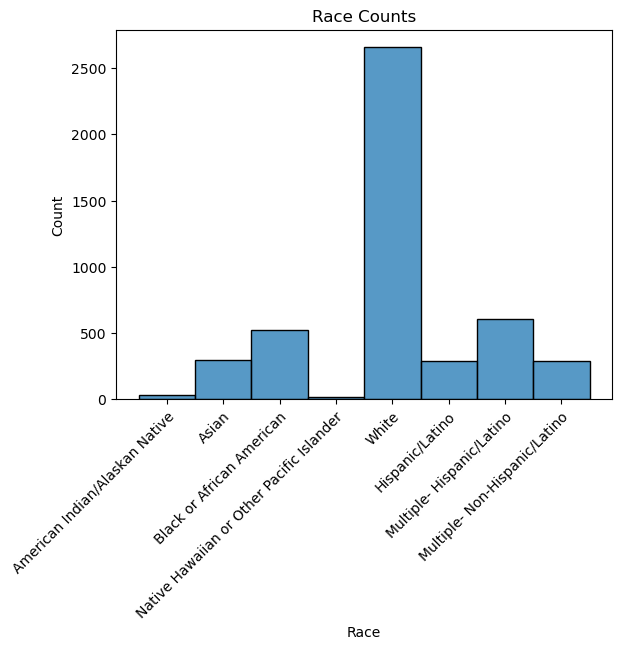

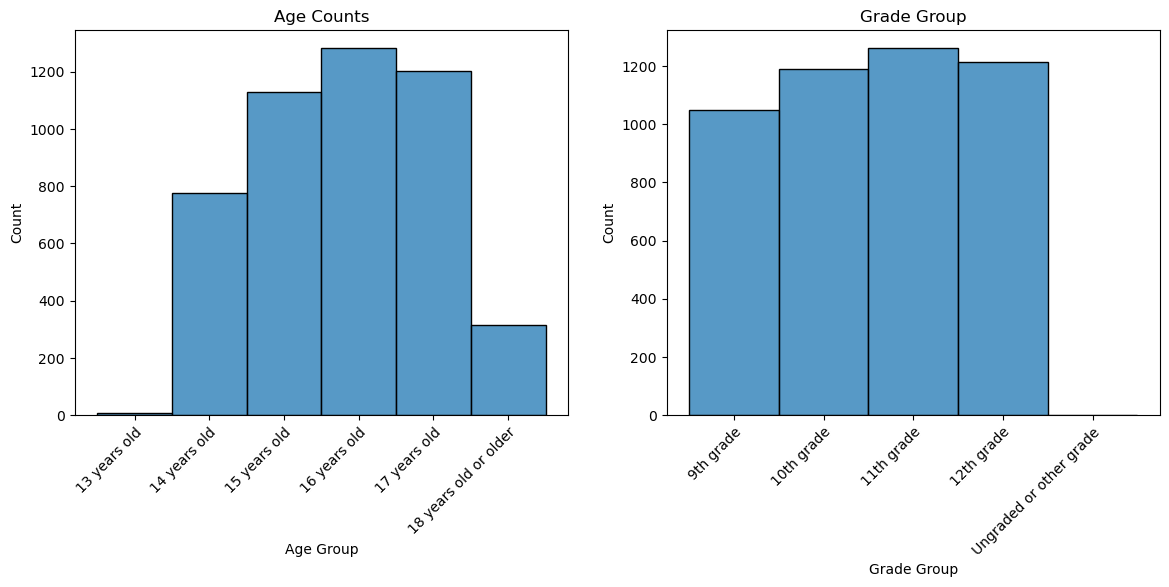

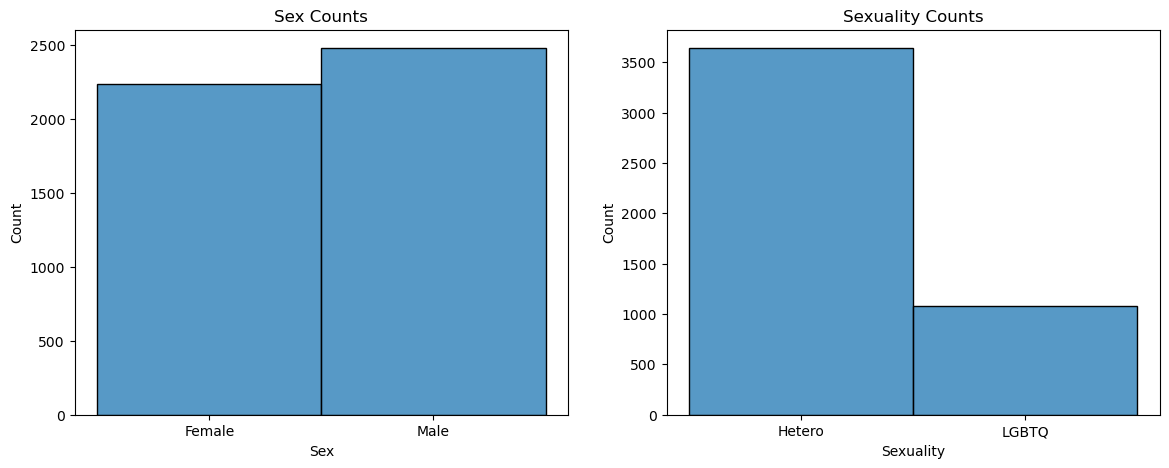

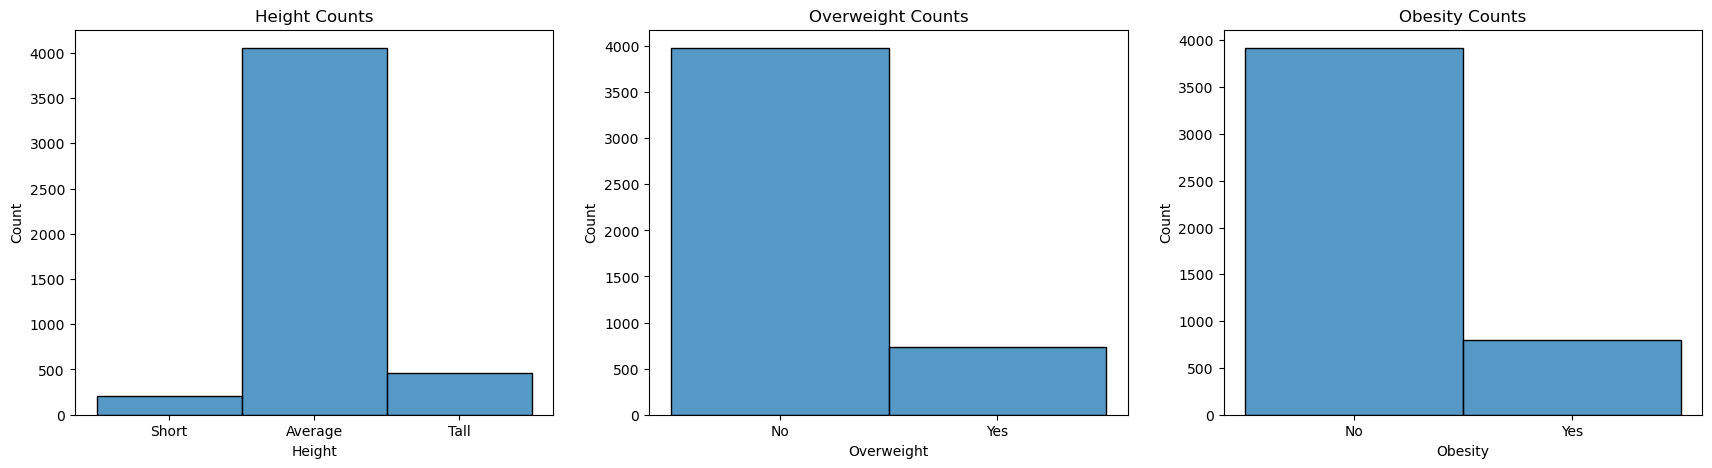

In [29]:
# Race Counts
plot_sex = sns.histplot(data=df_target_labeled_suicidal_race, x='Race')
plot_sex.set(title='Race Counts')
plot_sex.set_xticklabels(labels=df_target_labeled_suicidal_race['Race'].unique(), rotation = 45, ha = "right", rotation_mode='anchor')

# Age and Grade Counts
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

plot_age = sns.histplot(data=df_target_labeled_suicidal_age, x='Age Group', ax=axes[0])
plot_age.set(title='Age Counts')
plot_age.set_xticklabels(labels=df_target_labeled_suicidal_age['Age Group'].unique(), rotation = 45, ha = "right", rotation_mode='anchor')

plot_grade = sns.histplot(data=df_target_labeled_suicidal_grade, x='Grade Group', ax=axes[1])
plot_grade.set(title='Grade Group')
plot_grade.set_xticklabels(labels=df_target_labeled_suicidal_grade['Grade Group'].unique(), rotation = 45, ha = "right", rotation_mode='anchor')

# Sex and Sexuality Counts
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

plot_sex = sns.histplot(data=df_target_labeled_suicidal_sex, x='Sex', ax=axes[0])
plot_sex.set(title='Sex Counts')

plot_sexuality = sns.histplot(data=df_target_labeled_suicidal_sexuality, x='Sexuality', ax=axes[1])
plot_sexuality.set(title='Sexuality Counts')

# Height, Overweight, and Obesity Counts
fig, axes = plt.subplots(1, 3, figsize=(21, 5))

plot_height = sns.histplot(data=df_target_labeled_suicidal_height, x='Height', ax=axes[0])
plot_height.set(title='Height Counts')

plot_owt = sns.histplot(data=df_target_labeled_suicidal_owt, x='qnowt', ax=axes[1])
plot_owt.set(title='Overweight Counts', xlabel='Overweight')

plot_obese = sns.histplot(data=df_target_labeled_suicidal_obese, x='qnobese', ax=axes[2])
plot_obese.set(title='Obesity Counts', xlabel='Obesity')

We can confirm that our suspicions were correct! One thing to note about our weight categories 'Overweight' and 'Obesity' is "Obesity" does not contain any people who are overweight. The "Overweight" category checks if a persons BMI is between the 85th and 95th percentiles, while the obesity category is for anyone above the 95th percentile. It is quite alarming that such a large number of people are obese as we would expect the counts to be less than the "Overweight" category. While this could be chalked up to errors in using a 2000s census data to categorize a 2021 questionnaire, obesity rates are a widly documented issue in the US and seeing such a discrepancy would not be unusual.

Now lets check for some trends between suicidal subjects and their demographics.

c:\Users\ekait\anaconda3\envs\DSC207R_PC\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ekait\anaconda3\envs\DSC207R_PC\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ekait\anaconda3\envs\DSC207R_PC\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ekait\anaconda3\envs\DSC207R_PC\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isin

[Text(0.5, 1.0, 'Suicide Risk by Obesity'), Text(0.5, 0, 'Obesity')]

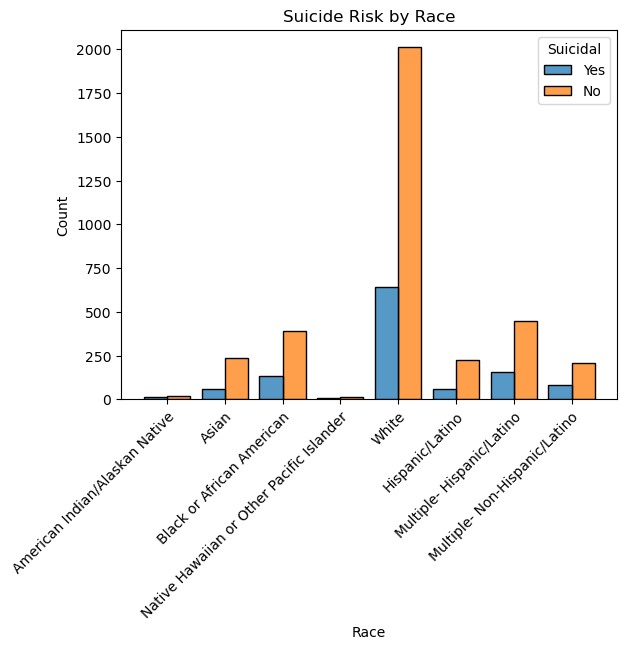

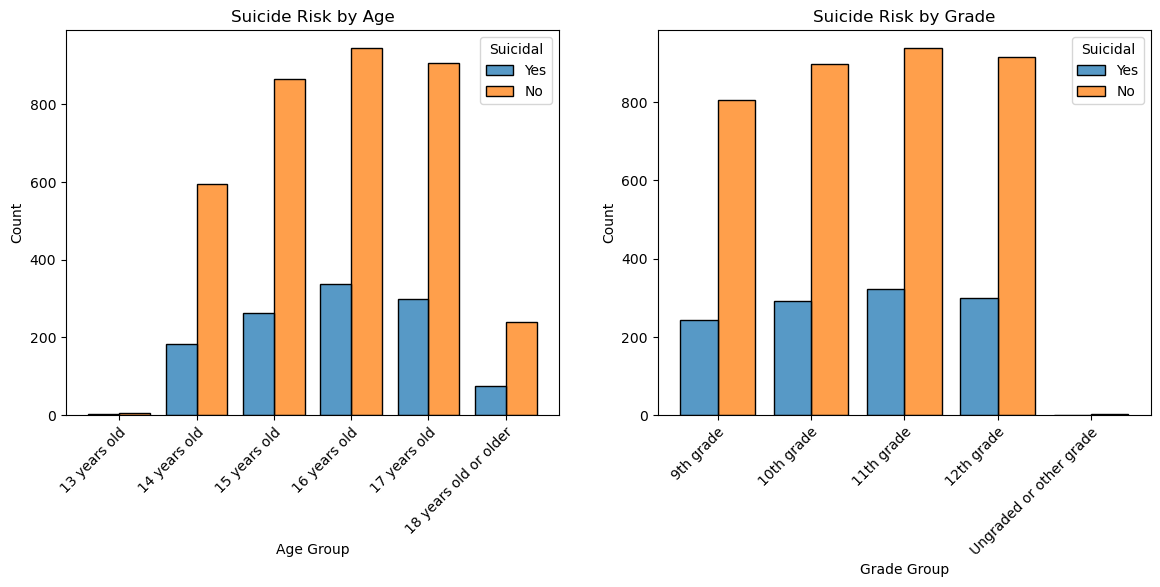

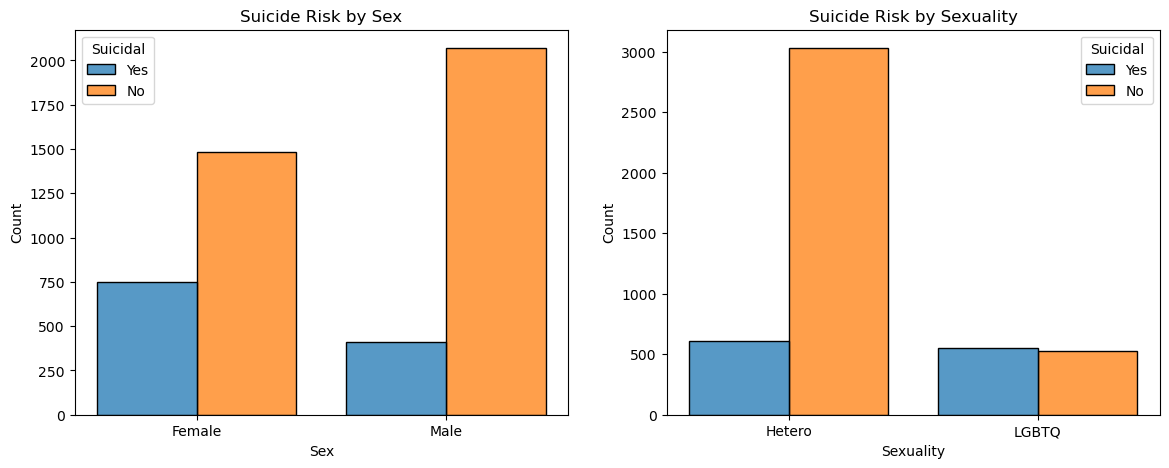

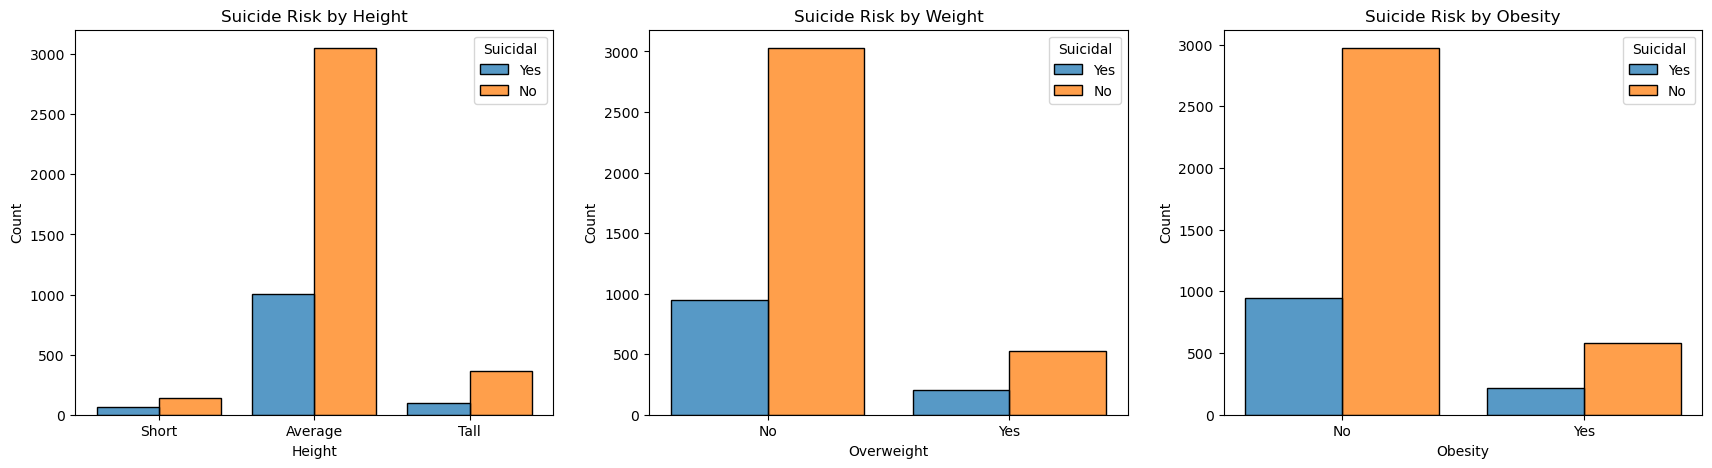

In [30]:
# Suicide Risk by Race
plot_sex_suicidal = sns.histplot(data=df_target_labeled_suicidal_race, x='Race', hue='Suicidal', hue_order=list_binary, multiple='dodge', shrink=.8)
plot_sex_suicidal.set(title='Suicide Risk by Race')
plot_sex_suicidal.set_xticklabels(labels=df_target_labeled_suicidal_race['Race'].unique(), rotation = 45, ha = "right", rotation_mode='anchor')

# Suicide Risk by Age and Grade
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
plot_age_suicidal = sns.histplot(data=df_target_labeled_suicidal_age, x='Age Group', hue='Suicidal', hue_order=list_binary, multiple='dodge', shrink=.8, ax=axes[0])
plot_age_suicidal.set(title='Suicide Risk by Age')
plot_age_suicidal.set_xticklabels(labels=df_target_labeled_suicidal_age['Age Group'].unique(), rotation = 45, ha = "right", rotation_mode='anchor')

plot_grade_suicidal = sns.histplot(data=df_target_labeled_suicidal_grade, x='Grade Group', hue='Suicidal', hue_order=list_binary, multiple='dodge', shrink=.8, ax=axes[1])
plot_grade_suicidal.set(title='Suicide Risk by Grade')
plot_grade_suicidal.set_xticklabels(labels=df_target_labeled_suicidal_grade['Grade Group'].unique(), rotation = 45, ha = "right", rotation_mode='anchor')

# Suicide Risk by Sex and Sexuality
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
plot_sex_suicidal = sns.histplot(data=df_target_labeled_suicidal_sex, x='Sex', hue='Suicidal', hue_order=list_binary, multiple='dodge', shrink=.8, ax=axes[0])
plot_sex_suicidal.set(title='Suicide Risk by Sex')

plot_sexuality_suicidal = sns.histplot(data=df_target_labeled_suicidal_sexuality, x='Sexuality', hue='Suicidal', hue_order=list_binary, multiple='dodge', shrink=.8, ax=axes[1])
plot_sexuality_suicidal.set(title='Suicide Risk by Sexuality')

# Suicide Risk by Height, Weight, and Obesity
fig, axes = plt.subplots(1, 3, figsize=(21, 5))
plot_height_suicidal = sns.histplot(data=df_target_labeled_suicidal_height, x='Height', hue='Suicidal', hue_order=list_binary, multiple='dodge', shrink=.8, ax=axes[0])
plot_height_suicidal.set(title='Suicide Risk by Height')

plot_owt_suicidal = sns.histplot(data=df_target_labeled_suicidal_owt, x='qnowt', hue='Suicidal', hue_order=list_binary, multiple='dodge', shrink=.8, ax=axes[1])
plot_owt_suicidal.set(title='Suicide Risk by Weight', xlabel='Overweight')

plot_obese_suicidal = sns.histplot(data=df_target_labeled_suicidal_obese, x='qnobese', hue='Suicidal', hue_order=list_binary, multiple='dodge', shrink=.8, ax=axes[2])
plot_obese_suicidal.set(title='Suicide Risk by Obesity', xlabel='Obesity')

From these graphs we some disturbing trends. It appears that women and those who are LGBTQ are more likely to be suicidal compared to any other demographic feature. This data does match some of the findings that the YRBS report has found as well. While there isn't a specific reason we can coax out from this preliminary finding, we can begin to unravel this in our research questions.

## Cleaning and Exploration Summary

**Dataset cleanliness**

The dataset required extensive cleaning. There were many missing values as a result of logic checks and unanswered questions. One upside to this is that the df_qn data set has already had its interesting points categorized for us, but as result there were many fields missing. Using the raw data set would have given us some of our data back, but going thru each variable individually would have been extremely time consuming and the amount we would have saved would have been inconsequential.

While the initial replacing of NaNs where appropriate and dropping the remainder was relatively straight forward, categorizing the data took quite a bit of effort. In total the cost was about 75% of our data. While this is unfortunate, the trade off of having a dataset we can confidently manipulate is worth it.

**Disturbing trends**

From our exploration we found that our data does have an extremely strong bias to the white demographic. When we are making conclusions later on in our data, it would be wise to keep this fact in mind.

Additionally, out of all our demographics, women and non-heterosexual individuals experienced the highest percentages of suicidal risk. This disturbing trend is something that has been noted in other sociology journals, which unfortunately helps to confirm some findings.

## Research Questions

My questions will focus on ways to better identify at risk students. Any way we can identify risky behaviors to better identify students that need assistance can be useful in many mental health applications. As such, my questions will be the following:

1) What features are most important in determining suicide risk? Can I use chi-square independent testing to check for important correlations that relate to suicide risk?

2) Can I make a model that predicts suicidal students based on their questionnaire answers? Using the important features found earlier, can I then use logistic regression to make a model that predicts suicide risk based on those features?

3) Can I group and predict at risk students based on non-mental health related questions? One of the key predictors that we will find (aside from demographics) are questions that focus on depression and mental health. Neuro-divergent individuals are more prone to suicide, so predicting these students will help narrow down larger populations when trying to determine at risk youth. Using k-mode clustering to group students based on their answers that discuss mental health, can I then use random forest sampling to predict neuro-divergent students?

## 1) What features are most important to determining suicide risk?

#### Linear Correlations

Text(0.5, 1.05, 'Top 10 Linear Correlations between Suicide Risk \n and Questionnaire Variables')

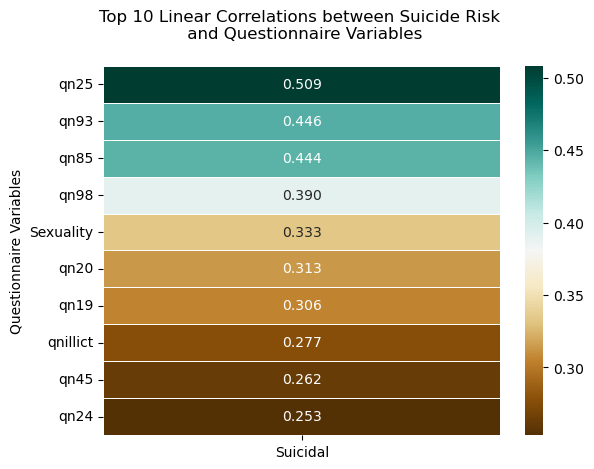

In [31]:
# Interested in correlation, not direction
# Removed relationship to itself

df_suicidal_corr = df_suicidal.corr()[['Suicidal']].abs().drop(['Suicidal'], axis=0)
df_suicidal_corr = df_suicidal_corr.sort_values(['Suicidal'], ascending=False)
df_suicidal_corr = df_suicidal_corr.nlargest(columns=['Suicidal'], n=10)
heat_suicidal = sns.heatmap(df_suicidal_corr, annot=True, cmap='BrBG', fmt=".3f", linewidth=.5)
heat_suicidal.set(ylabel="Questionnaire Variables")
heat_suicidal.set_title(label="Top 10 Linear Correlations between Suicide Risk \n and Questionnaire Variables", y = 1.05)

This correlation shows us that indeed our questions regarding mental health (question 25, question 85, question 93, and question 98) are the strongest correlators to suicide risk. But this assumes linearity, and a lot of our data is binary yes or no questions which do not lend well to linear relationships. In order to account for this we apply chi2-independent testing.

### Chi-Square Independent Testing

In [32]:
# Setting up chi-square dataframe
df_chi_pre = df_suicidal_labeled.drop(['record'], axis = 1)

In [33]:
# Creating chi-square comparison list
cat_var1 = ['Suicidal']
cat_var2 = (df_chi_pre.columns.unique())
cat_var_prod = list(product(cat_var1, cat_var2, repeat=1))

In [34]:
# Performing chi-square independent testing on each pair in the comparison list created earlier
# Outputs the p-value as a result of each pair
chi_results = []

for i in cat_var_prod:
    if i[0] != i[1]:
        chi_results.append((i[0],i[1],list(ss.chi2_contingency(pd.crosstab(df_chi_pre[i[0]], df_chi_pre[i[1]])))[1]))

chi_test_output = pd.DataFrame(chi_results, columns = ['var1', 'var2','coeff'])

In [35]:
# Final result as a dataframe
df_chi_rank = chi_test_output.sort_values('coeff').reset_index(drop=True)
df_chi_rank.head()

,var1,var2,coeff
0,Suicidal,qn25,1.279042e-266
1,Suicidal,qn93,2.787983e-205
2,Suicidal,qn85,1.392818e-203
3,Suicidal,qn98,1.685646e-157
4,Suicidal,Sexuality,2.014844e-115


Text(0.5, 1.05, 'Top 10 -log10 Chi-Square Indpendent Tests \n between Suicide Risk and Questionnaire Variables')

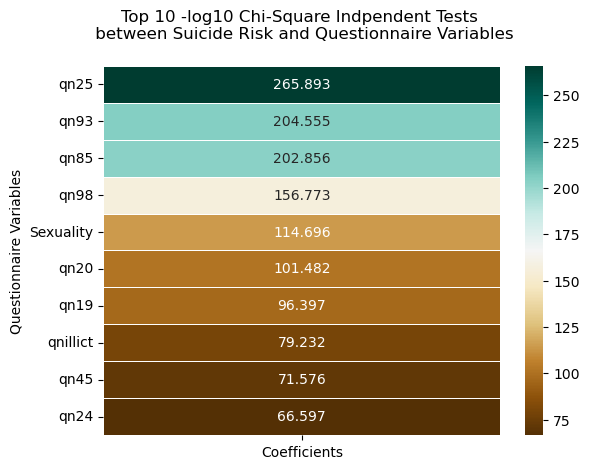

In [36]:
# Setup heatmap of -log of Chi-Square coefficients
df_suicidal_chi = df_chi_rank.copy()
df_suicidal_chi = df_suicidal_chi.rename({'coeff':'Coefficients'}, axis=1)
df_suicidal_chi['Coefficients'] = df_suicidal_chi['Coefficients'].sort_values()
df_suicidal_chi['Coefficients'] = -np.log10(df_suicidal_chi['Coefficients'])
df_suicidal_chi.index = df_suicidal_chi['var2']
df_suicidal_chi = df_suicidal_chi.drop(['var1', 'var2'], axis=1)
df_suicidal_chi = df_suicidal_chi.head(10)
df_suicidal_chi
heat_suicidal_chi = sns.heatmap(df_suicidal_chi, annot=True, cmap='BrBG', fmt=".3f", linewidth=.5)
heat_suicidal_chi.set(ylabel='Questionnaire Variables')
heat_suicidal_chi.set_title(label="Top 10 -log10 Chi-Square Indpendent Tests \n between Suicide Risk and Questionnaire Variables", y = 1.05)

We see above that our correlations are quite similar to the linear correlations. In order to narrow down to a final list, we will use the Holm-Bonferroni correction method to account for familywise error rates and determine which of these independent chi-square tests are actually significant. We will assume a alpha target level of 0.05.

In [37]:
holmBonf_condition = df_chi_rank['coeff'] < ((0.05)/(len(df_chi_rank) - (df_chi_rank.index + 1) + 1))
df_chi_rank['Check'] = np.where(holmBonf_condition, 'Pass', 'Fail')
df_chi_pass = df_chi_rank[df_chi_rank['Check'] == 'Pass']
list(df_chi_pass['var2'])

['qn25',
 'qn93',
 'qn85',
 'qn98',
 'Sexuality',
 'qn20',
 'qn19',
 'qnillict',
 'qn45',
 'qn24',
 'qn49',
 'qn47',
 'qn23',
 'qn21',
 'qntb4',
 'qn34',
 'qn30',
 'qn96',
 'qn18',
 'Sex',
 'qn41',
 'qn40',
 'qn56',
 'qn57',
 'qnfrevp',
 'qn31',
 'qn14',
 'qn88',
 'qnbk7day',
 'qn22',
 'qn15',
 'qn67',
 'qn39',
 'qn16',
 'qn42',
 'qn48',
 'qn46',
 'qn60',
 'qn61',
 'qn76',
 'qn97',
 'qn66',
 'qn86',
 'qn9',
 'qn58',
 'qn12',
 'qn8',
 'qn80',
 'qn94',
 'qn87',
 'qn59',
 'qn77',
 'qn78',
 'qn75',
 'qnpa0day',
 'qn44',
 'qn82',
 'qn83',
 'qn55',
 'qn92',
 'qnsoda1',
 'qn84',
 'qn13',
 'qn43',
 'qn17',
 'qnfrcig',
 'qnwater1',
 'qn10',
 'qn33',
 'qn79',
 'qnfrcgr',
 'qn81',
 'qn63']

### Summary of Question 1

Here we see the values that are most correlated with our suicide category. We can see the top 4 scores are questions relating to mental health, which is line with our with our assumptions. Sex and Sexuality being our 2 demographic correlations demonstrates the connection between sex, sexuality and suicide. We must be careful to say that these connections are not a causation, merely that they are related. We will now use these top values to create a logistics regression model to predict a students suicide risk.

## 2) Can we predict suicidal students based on their questionnaire answers?

Now we will attempt to predict a students suicide risk using a logistic regression model. We use this model over a linear regression as our data is entirely categorical.

### Data Preparation

In [38]:
# Data frame preperation
df_reg = df_suicidal.drop(list(df_chi_rank[df_chi_rank['Check'] == 'Fail']['var2']), axis=1)
df_reg = df_reg.drop(['record'], axis=1)
df_reg.head()

,Sex,Sexuality,qn8,qn9,qn10,qn12,qn13,qn14,qn15,qn16,...,qnfrcig,qnfrevp,qnfrcgr,qntb4,qnsoda1,qnbk7day,qnpa0day,qnwater1,qnillict,Suicidal
0,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [39]:
# Splitting our dataset
X_reg = (df_reg.drop(['Suicidal'], axis=1))
y_reg = (df_reg['Suicidal'])

In [40]:
# Creating training and test datasets
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size= 0.2, random_state=0)

In [41]:
# Checking our training and test datasets
print(X_train_reg.shape)
print(X_test_reg.shape)
print(y_train_reg.shape)
print(y_test_reg.shape)

(3772, 73)
(943, 73)
(3772,)
(943,)


### Logistic Regression

In [42]:
# Performing fit
log_reg = LogisticRegression().fit(X_train_reg, y_train_reg)

In [43]:
# Checking predictions
log_reg_predict = log_reg.predict(X_test_reg)
log_reg_predict

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [44]:
# Checking prediction score
log_reg_score = log_reg.score(X_test_reg,y_test_reg)
log_reg_score

0.8345705196182397

In [45]:
# Finding important features in the regression
log_reg_importance = log_reg.coef_.flatten()
log_reg_importance

array([ 2.11347585e-01,  8.72411506e-01,  8.69576795e-03, -1.99952292e-02,
        8.55025954e-03,  8.76995247e-01, -1.23850350e-01,  8.33960689e-02,
        2.22816580e-01,  2.08734191e-01,  1.08205044e-01,  2.52013685e-01,
        7.21962491e-01,  4.56908415e-01,  2.98463887e-01, -1.94475883e-01,
        2.62405655e-02,  3.32686522e-01,  1.29204408e+00, -1.61575055e-01,
        3.38329405e-01,  5.44286683e-01, -3.32935213e-02, -9.73572216e-02,
        1.77988252e-01,  3.95519725e-02, -1.06290201e-01, -2.29075209e-01,
        2.54707528e-02,  3.64756418e-01,  4.77667753e-02,  1.80538596e-01,
       -3.27320584e-01,  2.22780740e-01,  4.29759565e-01,  5.66586385e-01,
       -8.59280105e-02,  2.09713963e-01, -4.58415532e-01, -3.42697954e-02,
       -2.51915811e-01,  3.04832085e-01,  1.37388070e-01,  2.44006377e-01,
        4.36786968e-02, -7.74553143e-03,  7.58635328e-02,  2.35562645e-01,
       -2.80851284e-02, -1.72254738e-02, -9.71790693e-02, -2.59074547e-01,
        1.76761497e-01, -

<Axes: title={'center': 'Top 10 Feature Important Variables of a Logistic Regrssion model of Suicidal Risk in Highschoolers'}, xlabel='Feature Importance', ylabel='Questionnaire Variables'>

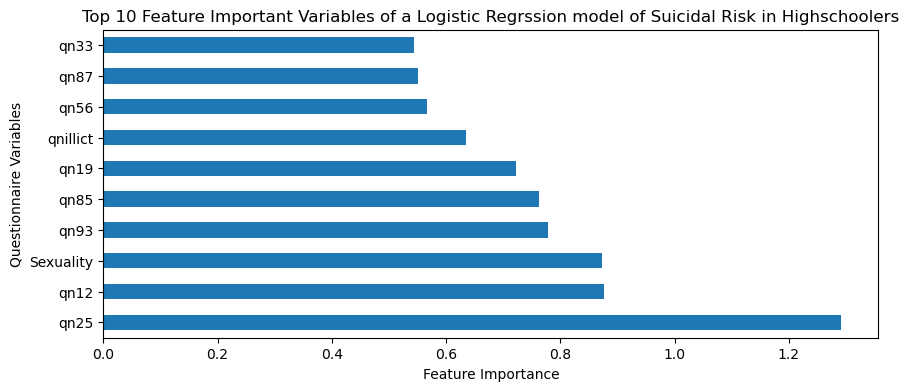

In [46]:
# Graphing the feature importance of all variables
feat_importance = pd.Series(log_reg_importance, index=X_train_reg.columns)
feat_importance.sort_values().nlargest(10).plot(kind='barh', figsize=[10,4], 
                                                title='Top 10 Feature Important Variables of a Logistic Regrssion model of Suicidal Risk in Highschoolers',
                                                xlabel='Feature Importance',
                                                ylabel='Questionnaire Variables')

### Summary of Question 2

Our regression model performed quite well, with a score of over 80%. What we see here is that, unlike our chi-square test, our most important features are a litte different. Lets layout the the top 3 and explore them. 

**QN25 - If students have felt sad or hopeless for more than 2 weeks in a row.**

Without much issue we can easily see the connection between qn25 and suicide risk. As state previously students who are depressed or are neuro-divergent are more likely to have suicidal tendencies. Using such a question as a predictor for suicide risk is appropriate.

**QN12 - If a student has brought a weapon to school.**

The importance of this feature could mean a number of things. Suicidal students may not feel safe at school which may contribute to depressive and suicidal tendencies. Another angle is that of school shootings. There is some reasearch that indicates student shooters have mental illnesses that are left un-addressed, one of which could be suicidal tendencies according to this model.

**Sexuality - If a student is heterosexual or not.**

As we discussed earlier sexuality has a strong correlation with suicide risk. One possible explanation is that of isolation. Students who belong to a sexual minority may experience bullying, ostracization, and other forms of aggression and micro-aggression.

I want to emphasize that these connections are merely posits. Saying a student who is homosexual is suicidal is a dangerous stance to take and we should be very careful to avoid that distinction. However these connections can not be ignored. The hidden explanatory variables at play require further research.

The remaining 7 questions are as follows:

QN93: If a students mental health during the COVID-19 pandemic was negative.

QN85: If a students mental health wasn't good during the last 30 days.

QN19: If a student experience sexual violence.

QNILLICT: If a students has ever used select illicit drugs (cocaine, inhalants, heroin, methamphetamines, ecstasy, or hallucinogens) more than once in their life.

QN56: If a student was offered, sold, or given illegal drugs on school property.

QN87: If a student usually slept somewhere aside from their guardian/parents home in the last 30 days.

QN33: If a student frequently smoked cigarettes.

## 3) Can we predict depressed students based on non-mental health related questions?

Mental health questions are a great indicator for a students suicidal risk. However mental health can be tricky to categorize and not everyone is willing to share what goes on internally. Being able to find events or non-mental health questions that a students is experiencing, and to then classify them as a depressed or not would be extermely helpful in finding at risk youth.

My goal here is to use kmodes to determine an optimal number of clusters based on questions surrounding depression. This will group people into different tiers of risk. The reason we are using kmodes clustering is because our data is wholely categorical, which does not lend well to kmeans clustering. Kmodes is on the other hand is designed for categorical data.

Then I will use random forest classification to make a prediction algorithim that classifies people into those categories based on non-health related questions. While our logistic regression model was quite good, I will be using the whole of our cleaned data set, including variables that have multiple categories. To circumvent the usage of one-hot encoding or dummy-variables I decided to go with random-forest classification.

### Kmodes Clustering

We will use our raw df_qn data set to maximize our data size for the kmodes categorization. We will then select for questions about mental health. The questions we selected are all questions that directly related to the mental health of the student, which are as follows:

QN25: Was the student sad or hopeless everyday for the past 2 week.

QN26: Did the student ever seriously consider suicide.

QN27: Did the student ever make a plan for suicide.

QN28: Did the student attempt suicide 1 or more times.

QN29: If the student attempted suicide, did it result in injuries that were treated by a medical professional.

QN85: Was the students mental health unwell for the majority of the past 30 days.

QN93: Was the students mental health unwell for the majority of the COVID-19 pandemic.

QN98: Becaue of physical, mental, or emotional problems, did the student have serious difficulty concentratin, remembering, or making decisions.

In [47]:
# Raw dataset of mental health questions and records
mental_list = ['record', 'qn25', 'qn26', 'qn27', 'qn28', 'qn29', 'qn85', 'qn93', 'qn98']
mental_hlth = df_qn[mental_list]
mental_hlth = mental_hlth.dropna().astype(int)

# Dataset with just mental questions, replacing 2 with 0
mental_hlth_qn = mental_hlth.drop(['record'], axis=1).replace(2, 0)

# Dataset with mental health questions records, replacing 2 with 0
mental_hlth_qn_record = pd.concat([mental_hlth['record'], mental_hlth_qn], axis=1)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 16566.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 16566.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 16566.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 16566.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 16566.0
Best run was number 1
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 766, cost: 8608.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 1009, cost: 8539.0
Run 2, iteration: 2/100, moves: 49, cost: 8539.0
Init: initializing cent

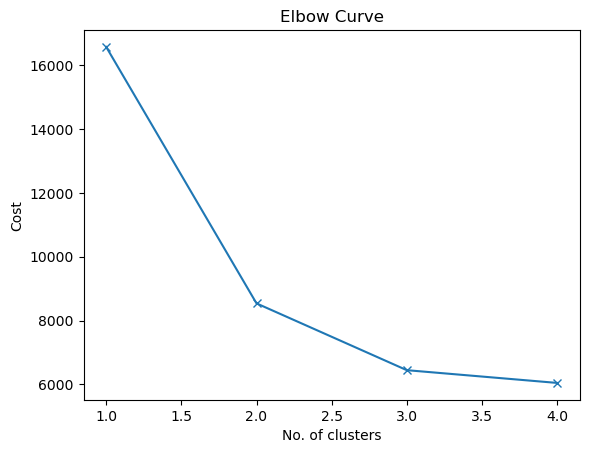

In [48]:
# Creating an elbow graph to determine the best cluster number
cost = []
K = range(1,5) 
for k in list(K): 
    kmode = KModes(n_clusters=k, init = "random", n_init = 5, verbose=1, random_state=0) 
    kmode.fit_predict(mental_hlth_qn) 
    cost.append(kmode.cost_) 
      
plt.plot(K, cost, 'x-') 
plt.xlabel('No. of clusters') 
plt.ylabel('Cost') 
plt.title('Elbow Curve') 
plt.show()

From our plot we can see that the ideal number of clusters is 2, so we will be moving forward with that in mind. This will categorize people into low and high risk mental health groups.

In [49]:
# Creating clusters based on our elbow curve
kmode = KModes(n_clusters=2, init = "random", n_init = 5, verbose=1, random_state=0) 
clusters = kmode.fit_predict(mental_hlth_qn)
clusters

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 766, cost: 8608.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 1009, cost: 8539.0
Run 2, iteration: 2/100, moves: 49, cost: 8539.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 1159, cost: 9210.0
Run 3, iteration: 2/100, moves: 133, cost: 9210.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 839, cost: 8539.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 589, cost: 8539.0
Best run was number 2


array([1, 1, 0, ..., 0, 0, 1], dtype=uint16)

In [50]:
# Finding cluster centroids
print(kmode.cluster_centroids_)

[[0 0 0 0 0 0 0 0]
 [1 1 0 0 0 1 1 1]]


In [51]:
print('Total Students:', len(mental_hlth_qn))
print(mental_hlth_qn.sum())

Total Students: 7690
qn25    3396
qn26    1874
qn27    1539
qn28     816
qn29     249
qn85    2262
qn93    2879
qn98    3551
dtype: int64


We can see that our cluster have been formed into 2 categories, students who have no mental health problems and those who do. The cluster analysis ignored students with serious suicide plans, likely due to their small number in comparison to the total number students present in the training data set.

We will now merge that data with our records.

In [52]:
# Assigning our cluster categories
mental_hlth_qn_record.insert(0,'Cluster',clusters,True)

In [53]:
# Checking how well our cluster performed
mental_cat = mental_hlth_qn_record.copy()
mental_cat.head()

,Cluster,record,qn25,qn26,qn27,qn28,qn29,qn85,qn93,qn98
1,1,11,1,1,1,1,0,1,1,0
2,1,12,1,1,0,0,0,1,1,1
3,0,13,0,0,0,0,0,0,0,1
4,0,14,0,0,0,0,0,0,0,0
5,1,15,1,1,1,1,0,0,1,0


We can see from this sample that our cluster did a pretty good job of assigning people to depressed and non-depressed categories.

c:\Users\ekait\anaconda3\envs\DSC207R_PC\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ekait\anaconda3\envs\DSC207R_PC\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ekait\anaconda3\envs\DSC207R_PC\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


[Text(0.5, 1.0, 'Depressed as categorized by Kmodes clustering')]

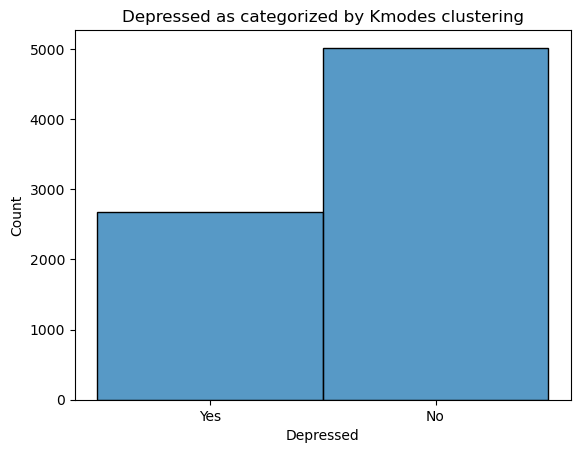

In [54]:
mental_plot = mental_cat.copy()
mental_plot = mental_plot.rename({'Cluster':'Depressed'}, axis=1)
mental_plot['Depressed'] = mental_plot['Depressed'].replace(dict_binary)
plot_depressed = sns.histplot(mental_plot, x='Depressed')
plot_depressed.set(title = 'Depressed as categorized by Kmodes clustering')

In [55]:
# Percent depressed of the total population
len(mental_cat[mental_cat['Cluster'] == 1])/len(mental_cat)*100

34.7334200260078

We can see that based on our categorization, 35% of all students in some way experience mental health issues.

### Random Forest Classification

Now lets apply this to a random forest algorithim. We are going to use the questions we cut from the chi-square test in order to maximize our selection criteria and to better determine if non-mental health related questions can help predict declining mental health.

In [56]:
# Setting up data frames
df_forest_prep = df.copy()
mental_cat = mental_cat[['record','Cluster']]
df_forest_cat = pd.merge(df_forest_prep, mental_cat, on='record')

In [57]:
# Dropping our mental health questions from earlier to avoid over-correlating and renaming our cluster category
df_forest = df_forest_cat.drop(mental_list, axis=1).astype(int)
df_forest = df_forest.rename({'Cluster':'Depressed'}, axis=1)
df_forest.head()

,Race,Age Group,Grade Group,Sex,Sexuality,Height,qnowt,qnobese,qn8,qn9,...,qnveg0,qnveg1,qnsoda1,qnbk7day,qnpa0day,qnnodnt,qnspdrk1,qnwater1,qnillict,Depressed
0,7,4,2,1,0,3,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
1,7,4,2,1,0,2,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
2,7,4,2,1,0,2,0,0,0,0,...,0,1,0,1,0,0,0,0,0,1
3,7,4,2,1,0,2,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
4,6,4,2,1,0,2,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0


In [58]:
# Spliting our data up
X_forest = df_forest.drop(columns=['Depressed'])
y_forest = df_forest['Depressed']

X_forest_train, X_forest_test, y_forest_train, y_forest_test = train_test_split(X_forest, y_forest, random_state=0, test_size=0.20)

In [59]:
# Initialize our random forest model
clf = RandomForestClassifier(random_state=0)
clf.fit(X_forest_train, y_forest_train)

RandomForestClassifier(random_state=0)

In [60]:
# Model accuracy
forest_predictions = clf.predict(X_forest_test)
print(accuracy_score(y_true=y_forest_test, y_pred=forest_predictions))

0.7879109225874867


<Axes: title={'center': 'Top 10 Feature Important Variables in Predicting Depression using Random Forest Classification'}, xlabel='Importance', ylabel='Features'>

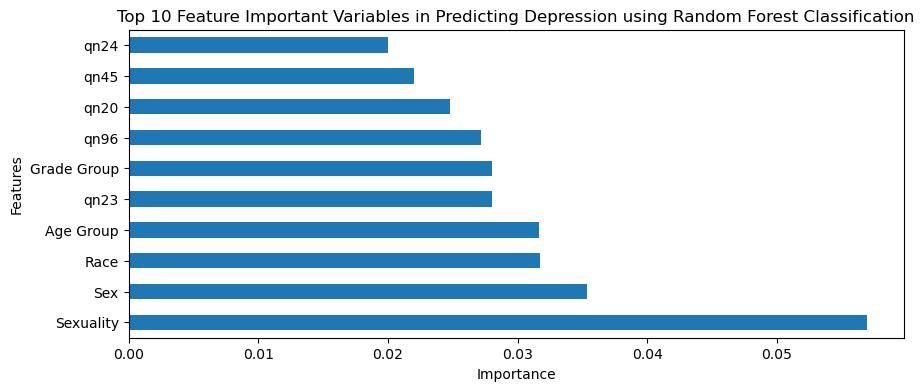

In [61]:
# Now lets look at feature importance
feat_importances_clf = pd.Series(clf.feature_importances_, index=X_forest_train.columns)
feat_importances_clf.nlargest(10).plot(kind="barh", 
                                       figsize=[10,4], 
                                       title="Top 10 Feature Important Variables in Predicting Depression using Random Forest Classification",
                                       xlabel="Importance",
                                       ylabel="Features")

### Summary of Question 3

Our random forest classifier model performed okay, with a score of approxinmately 78%. But unlike our previous answers, we see that this model heavily relies on demographics. We purposefully left such variables in, in hopes of maximizing our variable options, and as a result our model became extremely biased, more so than the previous ones. This goes to show that while putting in any predictor could be helpful in pointing out our findings, this is not always in our best interest. Remember that our 3rd highest predictor is race, but also our data set is predominantly white. If we had students of color fill out this questionnaire and use it as a predictive model for depression, it may say they aren't depressed when in fact they are. Let's go over some of these questions.

**Demographics - Sexuality, Sex, Race, Age Group, and Grade Group**

While our data shows that sexuality is a strong predictor for depression, we again should be careful in making such predictions using this method. Like in our example stated earlier, a gay student might end up being categorized as depressed without much weight given to other features. For features that we saw earlier that did not have high correlations such as Race, Age, and Grade Group, it is curious that these were selected as the strongest predictors. One reason for age and grade is that there is a bit of normal curve amongst respondants centering on 10th and 11th graders, which are approximately 15 and 16 years old. This might end up weighing depression as a feature that relates to these over-expressed ages.

**QN23 - If a student had been bullied.**

This featuere is much closer to what we expect to see in our relationships. There is plenty of literature that explains that bullied students are at higher risk for mental illness. What is most interesting to see is that our model has this as the most important non-demographic question which was not the case in our previous model.

**QN96 - If a student feels close to people at school or not.**

This is another feature that is more in line with what we expect to see. Loneliness and social connection are some of the most important features in determining an individuals happiness. Being isolated, even for people who are introverted, is not something that is sustainable. Plenty of jounrnals and annectodes mention having a group to get along with greatly mitigates a persons depression.

As stated prior these connections are to be handled with care. While the correlations exist in our data, our data is highly racially skewed and is not representative of the population as whole.

The remaining 3 questions are as follows:

QN20: If a student has experienced sexual violence.

QN45: If a student has ever smoked marijuana.

QN24: If a student has exerpienced cyber bullying.


## Conclusions

This data set is quite interesting. While I did use it to examine mental health and suicidal risk, there is considerable effort given towards questions that tackle physical health. Creating models that focus on physical health could be more accurate. That being said, there are some very valuable connections that we were able to find. Mental health is deeply linked to social connections. The highest predictors that aren't related to mental health directly were bullying, sexual violence, and drug use. A questionnaire that is more focused on those kinds of inferences may be better suited to our task.

As we have mentioned throughout this project, there is a heavy bias in this dataset. Using these models, while potentially helpful in the right environment, would be a dis-service to minority groups. Further sampling needs to be conducted so we can account for these errors.